Saving Facebook_Marketplace_data.csv to Facebook_Marketplace_data.csv


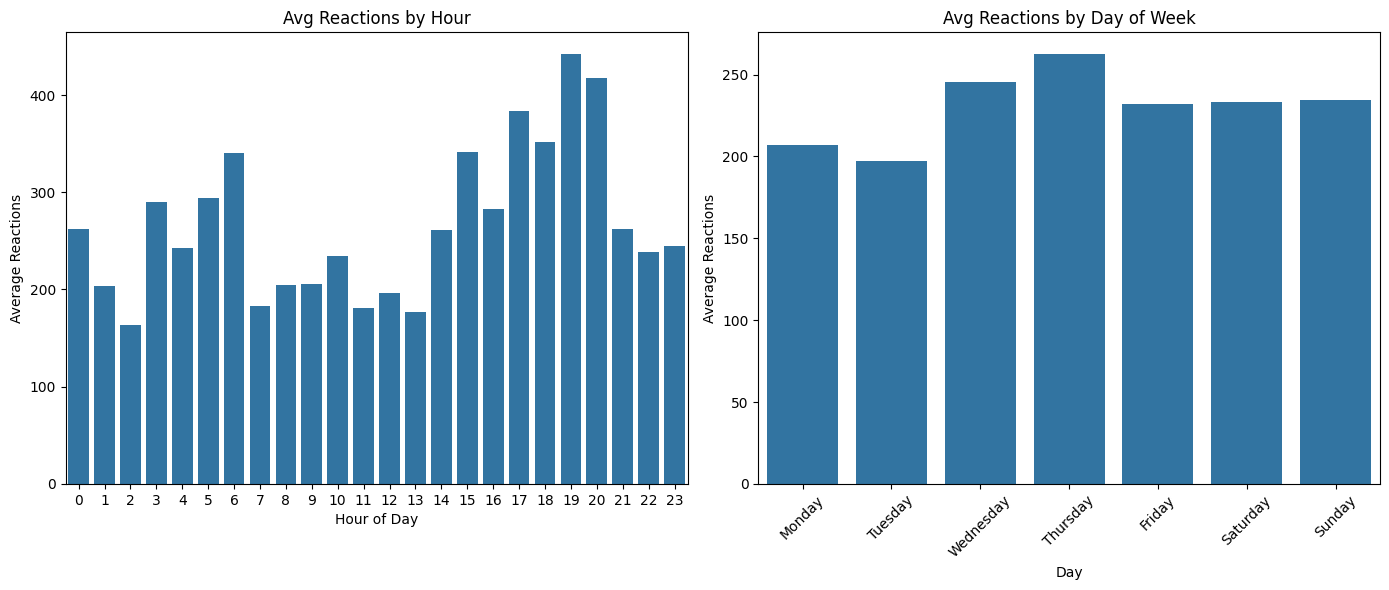

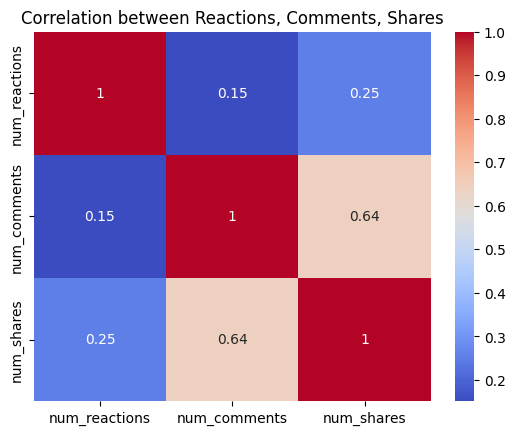

Correlation Matrix:
                num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


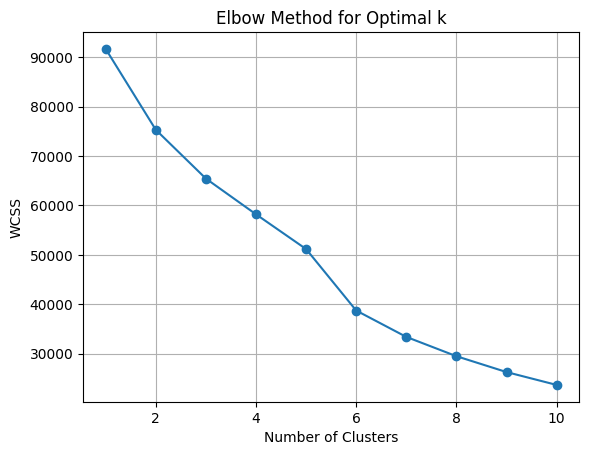

Post Type Counts:
 status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64
Average Metrics by Post Type:
              num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Facebook_Marketplace_data.csv")
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], errors='ignore')
# Converting date column
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')
df['hour'] = df['status_published'].dt.hour
df['weekday'] = df['status_published'].dt.day_name()
# 1. Time of upload effect
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=df.groupby('hour')['num_reactions'].mean().index,
            y=df.groupby('hour')['num_reactions'].mean().values)
plt.title('Avg Reactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Reactions')
plt.subplot(1, 2, 2)
weekday_avg = df.groupby('weekday')['num_reactions'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)
plt.title('Avg Reactions by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Reactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 2. Correlation between reactions, comments, shares
corr_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Reactions, Comments, Shares")
plt.show()
print("Correlation Matrix:\n", corr_matrix)
# 3. KMeans clustering
features = ['status_type', 'num_reactions', 'num_comments', 'num_shares','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df_encoded = pd.get_dummies(df[features], columns=['status_type'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
# 4. Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
# 5. Count of different types of posts
post_type_counts = df['status_type'].value_counts()
print("Post Type Counts:\n", post_type_counts)
# 6. Average metrics
avg_metrics = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print("Average Metrics by Post Type:\n", avg_metrics)